# Análise de Dados

## Instruções:
    1- Responda as perguntas listadas no README.md
    2- Faça as análises que julgar necessárias e deixe os resultados de suas análises plotadas no notebook.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Análise exploratória dos dados

### Carga das bases de dados

In [2]:
arquivo = "dados/populacao-pib-municipios-mg.csv"

# transformar o arquivo em um dataframe
pop_pib_municipios_mg = pd.read_csv(arquivo)

pop_pib_municipios_mg

,UF,Municipio,PIB,Populacao
0,MG,Abadia dos Dourados,176.774,7.022
1,MG,Abaeté,541.239,23.263
2,MG,Abre Campo,262.687,13.434
3,MG,Acaiaca,64.907,3.995
4,MG,Açucena,165.824,9.270
...,...,...,...,...
848,MG,Virginópolis,183.953,10.459
849,MG,Virgolândia,62.674,5.303
850,MG,Visconde do Rio Branco,1.351.679,43.351
851,MG,Volta Grande,140.361,5.270


In [3]:
arquivo = "dados/focos-desmatamento-mg.geojson"

# transformar o arquivo em um geodataframe
focos_desmatamento_mg = gpd.read_file(arquivo)

focos_desmatamento_mg

,Bioma,Cena,Cia PM,Data Final,Data Inicial,Instância,Mes,NuFis,Score,geometry
0,Mata Atlântica,22KEC,5,09/09/2022,15/08/2022,56,setembro_22,Triângulo Mineiro,0.94,"POLYGON ((-124558.799 7777208.524, -124607.724..."
1,Cerrado,22KED,9,24/09/2022,19/09/2022,273,setembro_22,Triângulo Mineiro,0.84,"POLYGON ((-75401.260 7868723.867, -75037.724 7..."
2,Cerrado,22KED,5,24/09/2022,19/09/2022,274,setembro_22,Triângulo Mineiro,0.81,"POLYGON ((-63866.920 7861093.781, -63927.596 7..."
3,Cerrado,22KED,5,24/09/2022,19/09/2022,275,setembro_22,Triângulo Mineiro,0.83,"POLYGON ((-40818.650 7858893.116, -40777.961 7..."
4,Cerrado,22KED,5,24/09/2022,19/09/2022,276,setembro_22,Triângulo Mineiro,0.9,"POLYGON ((-32119.895 7858592.513, -32167.326 7..."
...,...,...,...,...,...,...,...,...,...,...
2034,Mata Atlântica,24LTH,15,22/06/2022,12/06/2022,14277,agosto_22,Jequitinhonha,0.92,"POLYGON ((929733.458 8249632.458, 929841.657 8..."
2035,Mata Atlântica,24LTH,15,22/06/2022,17/06/2022,14507,agosto_22,Jequitinhonha,0.9,"POLYGON ((865579.305 8254142.756, 865667.952 8..."
2036,Mata Atlântica,24LUH,15,17/06/2022,07/06/2022,14842,agosto_22,Jequitinhonha,0.93,"POLYGON ((1004217.190 8208186.158, 1004354.862..."
2037,Mata Atlântica,24LUH,15,17/06/2022,07/06/2022,14843,agosto_22,Jequitinhonha,0.91,"POLYGON ((1005214.194 8208255.048, 1005509.008..."


In [4]:
arquivo = "dados/municipios-mg.geojson"

# transformar o arquivo em um geodataframe
municipios_mg = gpd.read_file(arquivo)

municipios_mg

,id,municipio,area,geometry
0,3100104,Abadia dos Dourados,895.115178,"POLYGON ((241429.802 7990562.876, 242359.697 7..."
1,3100203,Abaeté,1814.504046,"POLYGON ((480831.209 7911603.048, 481764.623 7..."
2,3100302,Abre Campo,472.049598,"POLYGON ((775002.321 7771717.815, 776244.590 7..."
3,3100401,Acaiaca,100.723996,"POLYGON ((696872.185 7747792.052, 697305.640 7..."
4,3100500,Açucena,812.875627,"POLYGON ((775332.208 7905556.756, 775804.655 7..."
...,...,...,...,...
848,3171808,Virginópolis,441.420798,"POLYGON ((741901.325 7935223.813, 744154.104 7..."
849,3171907,Virgolândia,281.912823,"POLYGON ((783014.609 7968328.380, 782934.821 7..."
850,3172004,Visconde do Rio Branco,241.559292,"POLYGON ((719981.237 7683148.509, 720339.567 7..."
851,3172103,Volta Grande,208.824427,"POLYGON ((755523.495 7598820.567, 755858.990 7..."


In [5]:
# calcular a área para cada geometria em km2
km = 10**6
focos_desmatamento_mg['Area'] = focos_desmatamento_mg['geometry'].area / km

In [6]:
# gera um relatório sobre desmatamento, agrupando os dados e calculando as áreas abrangidas por ele
def relatorio_desmatamento(unidade, focos_desmatamento_mg, agrupamento):
    
    # converter unidade de medida km2 = 1, ha = 100
    if unidade == 'ha':
        multiplicador = 100
    else:
        multiplicador = 1
    
    # agrupar os dados por bioma por bioma e somando as áreas
    areas = focos_desmatamento_mg.groupby(agrupamento)['Area'].sum() * multiplicador

    # acrescenta o total acumulado dos meses
    areas.loc['total_desmatado'] = areas.sum()

    # gerar tabela para apresentar a area desmatada
    df_areas = pd.DataFrame(areas)

    # formatar os dados para serem exibidos
    formato_string = '{{:.2f}} {}'.format(unidade)
    df_areas = df_areas.applymap(formato_string.format)

    return df_areas

### Área total desmatada em Minas Gerais entre os meses de agosto e setembro de 2022:

In [7]:
df_areas_desmatadas_mes = relatorio_desmatamento('ha', focos_desmatamento_mg, 'Mes')

df_areas_desmatadas_mes.T

Mes,agosto_22,setembro_22,total_desmatado
Area,12557.69 ha,28605.45 ha,41163.14 ha


### Área total desmatada em Minas Gerais entre os meses de agosto e setembro de 2022 por bioma:

In [8]:
df_areas_desmatadas_por_bioma = relatorio_desmatamento('km2', focos_desmatamento_mg, ['Mes', 'Bioma'])

df_areas_desmatadas_por_bioma

Area
Mes             Bioma                     
agosto_22       Caatinga         13.92 km2
                Cerrado          59.66 km2
                Mata Atlântica   52.00 km2
setembro_22     Caatinga         44.76 km2
                Cerrado         175.28 km2
                Mata Atlântica   66.02 km2
total_desmatado                 411.63 km2

### Área total desmatada em Minas Gerais entre os meses de agosto e setembro de 2022 por município:

In [9]:
# identificar as áreas de desmatamento que tem interseção com os limites municipais
desmatamento_municipios = gpd.overlay(focos_desmatamento_mg, municipios_mg, how='intersection')

# agrupar por mês e município e somar as áreas
area_total_mes_municipio = desmatamento_municipios.groupby(['Mes', 'municipio'])['Area'].sum()

# gerar tabela para apresentar a area desmatada
df_area_total_mes_municipio = pd.DataFrame(area_total_mes_municipio).unstack().T

# preencher resultados nulos com 0
df_area_total_mes_municipio = df_area_total_mes_municipio.fillna(0)

# calcular o total acumulado dos meses por municipio
df_area_total_mes_municipio['total_desmatado'] = df_area_total_mes_municipio['agosto_22'] + df_area_total_mes_municipio['setembro_22']

# formatar os dados para serem exibidos
df_area_total_mes_municipio = df_area_total_mes_municipio.applymap('{:.2f} km2'.format)

# resetar o índice
df_area_total_mes_municipio = df_area_total_mes_municipio.reset_index()
df_area_total_mes_municipio = df_area_total_mes_municipio.rename_axis(None, axis=1)

# selecionar apenas as colunas relevantes
colunas_relevantes = ['municipio', 'agosto_22', 'setembro_22', 'total_desmatado']
df_area_total_mes_municipio = df_area_total_mes_municipio[colunas_relevantes]

df_area_total_mes_municipio

,municipio,agosto_22,setembro_22,total_desmatado
0,Abadia dos Dourados,0.24 km2,0.14 km2,0.38 km2
1,Abaeté,0.21 km2,0.00 km2,0.21 km2
2,Aimorés,0.03 km2,1.20 km2,1.23 km2
3,Alfenas,0.00 km2,0.17 km2,0.17 km2
4,Alfredo Vasconcelos,0.32 km2,0.00 km2,0.32 km2
...,...,...,...,...
421,Várzea da Palma,0.72 km2,0.72 km2,1.44 km2
422,Água Boa,0.02 km2,0.34 km2,0.36 km2
423,Água Comprida,1.63 km2,0.00 km2,1.63 km2
424,Águas Formosas,0.00 km2,0.26 km2,0.26 km2


## Análise de correlação entre as variáveis de população e PIB dos municípios de Minas Gerais e a área desmatada

In [10]:
# converter km2 para hectares
ha = 100

# mesclar pop_pib_municipios_mg e df_area_total_mes_municipio
corr_pib_populacao_desmatamento = pd.merge(pop_pib_municipios_mg, df_area_total_mes_municipio, left_on='Municipio', right_on='municipio', how='inner')

# remover espaços e pontos das colunas e transformar os dados em tipo float
corr_pib_populacao_desmatamento['PIB'] = corr_pib_populacao_desmatamento['PIB'].str.replace('.', '').str.strip().astype(float)
corr_pib_populacao_desmatamento['Populacao'] = corr_pib_populacao_desmatamento['Populacao'].str.replace('.', '').str.strip().astype(float)
corr_pib_populacao_desmatamento['total_desmatado'] = corr_pib_populacao_desmatamento['total_desmatado'].str.replace(' km2', '').astype(float)

# convertar area de km2 para hectares
corr_pib_populacao_desmatamento['total_desmatado'] = corr_pib_populacao_desmatamento['total_desmatado'] * ha

# calcular a correlação entre as variáveis e exibir tabela
matriz_correlacao = corr_pib_populacao_desmatamento[['Populacao', 'PIB', 'total_desmatado']].corr(method='pearson')

matriz_correlacao

,Populacao,PIB,total_desmatado
Populacao,1.000000,0.911116,0.022270
PIB,0.911116,1.000000,0.137478
total_desmatado,0.022270,0.137478,1.000000


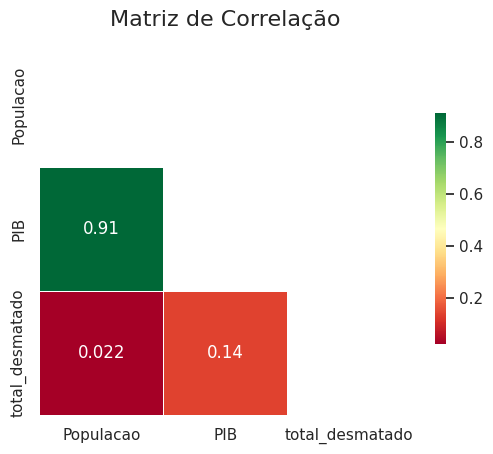

In [11]:
# plota um mapa de calor para uma matriz de correlação
def plotar_mapa_de_calor(matriz_correlacao, titulo, tamanho):
    # definir o estilo do gráfico
    sns.set(style='white')

    # criar a máscara para a parte superior do triângulo
    mascara = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

    # configurar o tamanho da figura
    plt.figure(figsize=tamanho)

    # criar o mapa de calor usando seaborn
    heatmap = sns.heatmap(matriz_correlacao, 
                          mask=mascara, 
                          annot=True, 
                          cmap="RdYlGn", 
                          square=True, 
                          linewidths=.5, 
                          cbar_kws={"shrink": .5})

    # configurar o título do gráfico
    heatmap.set_title(titulo, fontdict={'fontsize': 16}, pad=12)

    # exibir o gráfico
    plt.show()

titulo='Matriz de Correlação'
tamanho=(6, 6)
plotar_mapa_de_calor(matriz_correlacao, titulo, tamanho)

### Inferências a partir das correlações:

A análise da matriz de correlação entre as variáveis apontadas, apresenta as seguintes relações:

    - Como já se esperava, existe uma correlação forte entre a quantidade de população e o PIB.

    - A baixa correlação indica uma ausência de relação entre a quantidade de população e a área total desmatada.

    - Apesar da relação pouco expressiva, pode-se considerar que lugares com PIB alto tendem a uma área desmatada ligeiramente maior.